# Understanding logistic output
We discussed the results of logistic regression. We looked at the relationship between a student being in the honours program and their gender. Using our dataset, we created a simple logistic regression.



In [ ]:
import pandas as pd
df = pd.read_csv("https://samples.work/big.data.ml/data/logit_example_class.csv")
df.head()

,female,read,write,math,hon,femalexmath
0,0,57,52,41,0,0
1,1,68,59,53,0,53
2,0,44,33,54,0,0
3,0,63,44,47,0,0
4,0,47,52,57,0,0


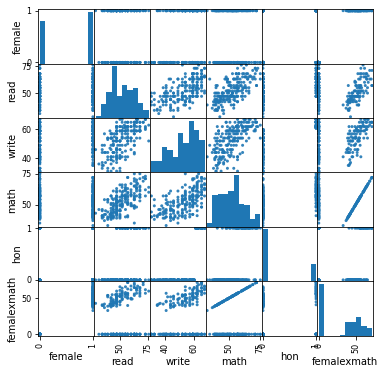

In [ ]:
# Plot a matrix of the variables in the data
# This shows scatter plots of each variable showing relationships between them.
# Along the diagnol is a histogram.
from pandas.plotting import scatter_matrix
sm = scatter_matrix(df, alpha = .9, figsize = (6, 6), diagonal = 'hist')

Below are the commands in R to run a simple logistic regression and the output that follows. The output would be similar in Python or with any other statistical package. The command glm() runs a generalized linear regression using the file “class.csv”. In this case, the dependent variable is hon (being in the honours class), and the independent variable is female. The regression results are placed in an object (m1) and then used as an argument to the summary() function that displays the model results.

In [ ]:
import statsmodels.formula.api as smf
from statsmodels.genmod import families

model_basic = smf.glm( formula="hon ~ 1 " , data = df, family=families.Binomial())
results_basic = model_basic.fit()
print(results_basic.aic )
print(results_basic.summary())

224.71004668626608
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    hon   No. Observations:                  200
Model:                            GLM   Df Residuals:                      199
Model Family:                Binomial   Df Model:                            0
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -111.36
Date:                Thu, 22 Sep 2022   Deviance:                       222.71
Time:                        12:04:41   Pearson chi2:                     200.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1255      0.164 

In [ ]:
model_female = smf.glm( formula="hon ~ female" , data = df, family=families.Binomial())
results_female = model_female.fit()
print(results_female.aic )
print(results_female.summary())

223.60624827524174
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    hon   No. Observations:                  200
Model:                            GLM   Df Residuals:                      198
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -109.80
Date:                Thu, 22 Sep 2022   Deviance:                       219.61
Time:                        12:04:58   Pearson chi2:                     200.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4709      0.269 

In [ ]:
model_female = smf.glm( formula="hon ~ female + read + math" , data = df, family=families.Binomial())
results_female = model_female.fit()
print(results_female.aic )
print(results_female.summary())

164.16955236516057
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    hon   No. Observations:                  200
Model:                            GLM   Df Residuals:                      196
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -78.085
Date:                Thu, 22 Sep 2022   Deviance:                       156.17
Time:                        09:58:08   Pearson chi2:                     168.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.7702      1.711 

# Explanation of the model output
## P-values
The column in green Pr(>|z|) shows the calculated p-value. In previous classes, you may have heard the rule of thumb that a p-value less than 5% indicates the statistical significance of the estimate. 

The p-value is the probability of seeing the result given that the null hypothesis is true. In a regression, the null hypothesis is that each estimated coefficient is equal to zero. These results indicate that females' estimated coefficient is significantly different from zero at the 8% level. (In other words, we would expect only to see a coefficient that size about 8% of the time under the null hypothesis. By conventional measures, then this would not be considered significant.)

## Coefficient estimates
The Estimate column shows the estimates of our simple linear regression model. The results show that the intercept is -1.471. According to our simple model, this indicates that for males, the odds are exp( -1.471 ) = .23. The estimated coefficient on female is 0.593. Recall that the dependent variable is the log odds of being in the honours class. We need to take the exp(0.593) =~ 1.81, which indicates that females' odds are about 80% higher than males.
Refer to the worksheet from class, and you’ll see that we calculated these odds from the table:
<pre>
              Female Male Sum
  Honours         32   17  49
  Not-honours     77   74 151
  Sum            109   91 200 
</pre>

In this case the intercept term has a meaningful interpretation. In most models it does not.

##AIC
The AIC is the Akaike Information Criterion measures the quality of fit of the model. A model with a lower AIC is generally considered to be better.


In [ ]:
# Get the AIC for the model
results_female.aic

223.60624827524174

Logistic Regression Model Fitting

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
X = df[['female', 'read', 'math']]
y = df['hon']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

Predicting the test set results and calculating the accuracy

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.75


Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[38  1]
 [14  7]]


The result is telling us that we have 38+7 correct predictions and 1+14 incorrect predictions.

Compute precision, recall, F-measure and support

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.97      0.84        39
           1       0.88      0.33      0.48        21

    accuracy                           0.75        60
   macro avg       0.80      0.65      0.66        60
weighted avg       0.78      0.75      0.71        60



The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

ROC Curve

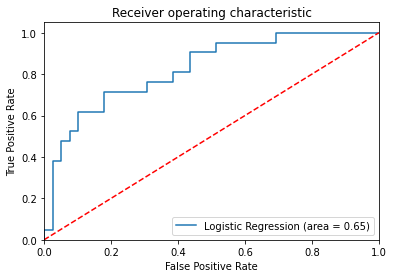

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).